In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

In [2]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.linear1 = nn.Linear(100, 1)
        self.linear2 = nn.Linear(1, 100)
    def forward(self, x):
        x = self.linear1(x)
        x = torch.relu(x)
        x = self.linear2(x)
        return x

In [3]:
model = MyModel()

criterion = nn.BCELoss()

optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

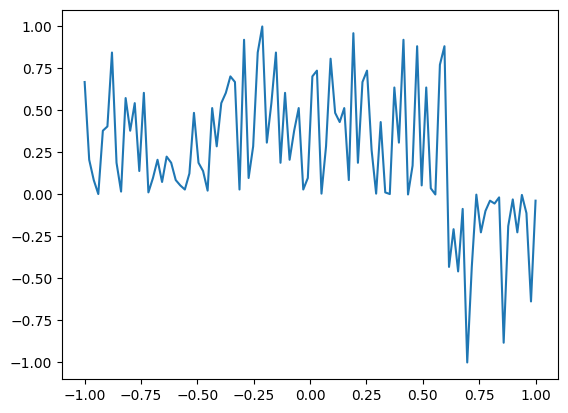

In [4]:
from torch.autograd import Variable

x = torch.linspace(-1,1,100)
all_indices = torch.tensor(len(x))

y_pos = x**2
y_neg = -y_pos

neg_index = torch.randint(0, len(x), (20,))
pos_index = torch.randint(0, len(x), (80,))

y = torch.cat([y_pos[pos_index], y_neg[neg_index]], dim = 0)

epochs = 1000

x_plot, y_plot = x.numpy(), y.numpy()

# Convert x and y to tracked variables
x = Variable(x)
y = Variable(y)

plt.plot(x_plot, y_plot)
plt.show()


Epoch 0: F1 score = 0.888888955116272
Epoch 10: F1 score = 0.888888955116272
Epoch 20: F1 score = 0.888888955116272
Epoch 30: F1 score = 0.888888955116272
Epoch 40: F1 score = 0.888888955116272
Epoch 50: F1 score = 0.888888955116272
Epoch 60: F1 score = 0.888888955116272
Epoch 70: F1 score = 0.888888955116272
Epoch 80: F1 score = 0.888888955116272
Epoch 90: F1 score = 0.888888955116272


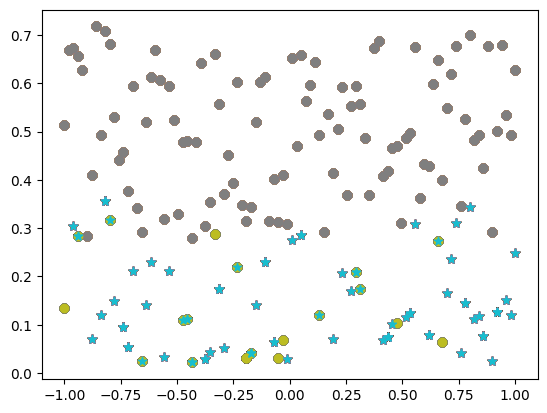

In [6]:
fig, ax = plt.subplots()
labels = torch.cat([torch.ones_like(y_pos[pos_index]), torch.zeros_like(y_neg[neg_index])], dim=0)
for epoch in range(100):
    y_pred = model(x)
    prob_pred = torch.sigmoid(y_pred)
    prob_log = torch.pow(prob_pred,3)
    tp = torch.sum((prob_log < 0.5) & (labels == 1))
    fp = torch.sum((prob_log < 0.5) & (labels == 0))
    fn = torch.sum((prob_log >= 0.5) & (labels == 1))
    
    prec = tp / (tp + fp + 1e-8)
    rec = tp / (tp + fn + 1e-8)
    
    f1 = 2 * prec * rec / (prec + rec + 1e-8)

    with torch.no_grad():
        for param in model.parameters():
            if param.grad is not None:
                param -= 0.01 * param.grad
                param.grad.zero_()

    ax.scatter(x_plot,prob_pred.detach().numpy())
    ax.scatter(x_plot[neg_index],prob_log[neg_index].detach().numpy(), marker= "o")
    ax.scatter(x_plot[pos_index],prob_log[pos_index].detach().numpy(), marker="*")
    # print(x_plot[neg_index])
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: F1 score = {f1.item()}")
    